In [1]:
import numpy as np

In [2]:
class Perceptron:
    
    def __init__(self, rate=0.01, cycles=1000):
        self.rate = rate
        self.cycles = cycles
    
    def run(self, points, ids):
        self.theta = np.zeros(np.size(points[0]))
        self.bias = 0
        
        self.loss = np.zeros(self.cycles)
        
        for i in range(self.cycles):
            for point, truth in zip(points, ids):
                error = (truth - self.predict(point)) / 2
                self.compute_loss(i, point, error)
                shift = error * self.rate
                self.bias += shift
                self.theta += shift * point

        self.report(points, ids)
        return self
    
    def compute_loss(self, i, x, y):
        self.loss[i] -= y * (np.dot(x, self.theta) + self.bias)
    
    def predict(self, ds):
        return np.where(np.dot(ds, self.theta) + self.bias > 0, 1, -1)
    
    def report(self, points, ids):
        miss = []
        for point, truth in zip(points, ids):
            prediction = self.predict(point)
            if truth - prediction != 0:
                miss.append([point, prediction, truth])
        if len(miss) > 0:
            print("Mislabeled:")
            for c in miss:
                print("{0}, prediction: {1}, truth: {2}".format(c[0], c[1], c[2]))

In [3]:
perc = Perceptron()

In [4]:
data = np.load('Data1/data.npz')
x = data['x']
y = np.where(data['y'] > 0, -1, 1)
print(x)
print(y)

[[ 0.04845277  1.10742891]
 [ 0.58890577  1.37055773]
 [ 2.96304424  1.14565929]
 [ 1.00065955  0.84380359]
 [ 0.59144945  1.19626117]
 [ 0.32282312  1.00607217]
 [ 0.26190525  1.21284114]
 [ 1.67040184  0.57323002]
 [ 3.02950457  1.33678586]
 [ 1.46205058  1.18793337]
 [ 0.9556217   1.40825577]
 [ 1.26470672  0.72145043]
 [ 0.75903185  0.77137579]
 [ 2.46583369  0.2621291 ]
 [ 0.39165722  0.72350883]
 [ 2.79751245  1.21613972]
 [ 2.31412115  1.10830046]
 [-0.53733665  1.38282973]
 [ 0.29986401  0.91208983]
 [ 2.84962037  0.3138899 ]]
[ 1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1]


In [5]:
out = perc.run(x,y)

In [6]:
print(out.theta)

[-0.00164721 -0.00864461]


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

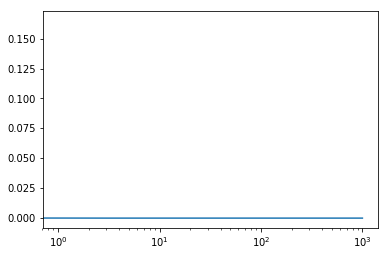

In [8]:
plt.plot(out.loss)
plt.xscale('log')

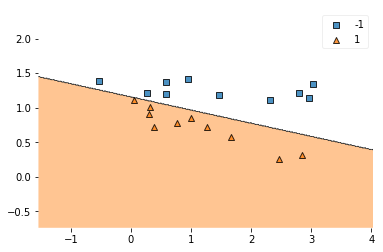

In [9]:
plot_decision_regions(x, y, clf=perc)